In [ ]:
# This project teaches how to import a pre-trained model (MobileNet) to classify a set of images.
# We use an existing dataset of cats and dogs images from Google.

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub # Used for MobileNet feature layer construction (Non-Edge Impulse Method)

from PIL import Image # Required to resize the images

from tensorflow.keras.preprocessing import image_dataset_from_directory 

# image_dataset_from_directory will return a tf.data.Dataset that yields batches of images from the subdirectories

# Porject could not be possible without the dataset from: https://www.kaggle.com/grassknoted/asl-alphabet

In [ ]:
# I needed to conenct my Google Drive because that was the location of all my datasets, as such there are many instances of references to the Drive

from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/ML_Datasets/sign_language_dataset.zip"
DATASET_FILENAME = "sign_language_dataset.zip"

BASE_DIR = "/content" # Base Directory in the Google colab notebook
RELATIVE_DATASET_DIR = "image_input_data"
ABSOLUTE_DATASET_DIR = "/content/image_input_data"

#These directories have already been pre-defined in the dataset I downloaded from Kaggle

TRAINING_DATA_FOLDER = "training_data"
TESTING_DATA_FOLDER = "testing_data"

In [ ]:
TARGETS = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]

In [ ]:
# Copy the zip file to the specified location on the Google Colab notebook

!cd {BASE_DIR}
%cp {DATA_PATH} {BASE_DIR}
!mkdir {RELATIVE_DATASET_DIR}
!ls

gdrive	image_input_data  sample_data  sign_language_dataset.zip


In [ ]:
!unzip {DATASET_FILENAME} -d {RELATIVE_DATASET_DIR}

In [ ]:
REDISTRIBUTED_TRAIN_DATA = "/content/training_data"
REDISTRIBUTED_TEST_DATA = "/content/testing_data"

!mkdir {REDISTRIBUTED_TRAIN_DATA}
!mkdir {REDISTRIBUTED_TEST_DATA}

!ls

gdrive		  sample_data		     testing_data
image_input_data  sign_language_dataset.zip  training_data


In [ ]:
# This refers to the original training and validation datasets as they were originally allocated by the Kaggle author, I manually redistribute the images later

train_dir = os.path.join(ABSOLUTE_DATASET_DIR, "asl_alphabet_train/asl_alphabet_train") # Do not use a slash on the second string, as then the first half will be discarded

validation_dir = os.path.join(ABSOLUTE_DATASET_DIR, 'asl_alphabet_test/asl_alphabet_test') 

In [ ]:
#The original validation directory has a few images which do not fit the same naming format as the vast majortiy, so we empty the directory
%cd {validation_dir}
%rm *.jpg
!ls

/content/image_input_data/asl_alphabet_test/asl_alphabet_test


In [ ]:
# Originally, only 1 image is allocated as a test image per label. We will have to manually allocate the number of Test and validation images

# Transferring only 1200 of the 2000 images in each TARGET to a new training folder (starting from the top of the original folder)

NUMBER_OF_TRAINING_IMAGES = 800

for target in TARGETS:

    CURRENT_DIRECTORY = train_dir + "/" + target
    %cd {CURRENT_DIRECTORY}

    NEW_TRAINING_DIRECTORY = REDISTRIBUTED_TRAIN_DATA + "/" + target
    !mkdir {NEW_TRAINING_DIRECTORY}
    %cp $(ls| head -n {NUMBER_OF_TRAINING_IMAGES}) {NEW_TRAINING_DIRECTORY}


/content/image_input_data/asl_alphabet_train/asl_alphabet_train/A
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/B
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/C
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/D
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/E
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/F
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/G
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/H
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/I
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/J
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/K
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/L
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/M
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/N
/content/image_input_data/asl_alphabet_train/asl_alphabet_train/O
/content/i

In [ ]:
# Transferring only 100 of the 2000 images in each TARGET to a new testing folder (starting from the bottom of the original folder)

NUMBER_OF_VALIDATION_IMAGES = 200

for target in TARGETS:

    CURRENT_DIRECTORY = train_dir + "/" + target  # Both the training and validation images come from the original training set
    %cd {CURRENT_DIRECTORY}

    NEW_TESTING_DIRECTORY = REDISTRIBUTED_TEST_DATA + "/" + target
    !mkdir {NEW_TESTING_DIRECTORY}
    %cp $(ls| tail -n {NUMBER_OF_VALIDATION_IMAGES}) {NEW_TESTING_DIRECTORY}


In [ ]:
# We point to the new training and validation datasets with a redistributed number of images (different from the original distribution)

train_dir = REDISTRIBUTED_TRAIN_DATA

validation_dir = REDISTRIBUTED_TEST_DATA

In [ ]:
# Information about the Training and Validation datasets

train_dir_classes = os.listdir(train_dir)
print("Number of Classes :", len(train_dir_classes))

print()

for target in TARGETS:

    CURRENT_DIRECTORY = train_dir + "/" + target
    current_number_of_images = os.listdir(CURRENT_DIRECTORY)
    print("Number of Images in Training Folder " + target + ":", len(current_number_of_images))

print()

for target in TARGETS:

    CURRENT_DIRECTORY = validation_dir + "/" + target
    current_number_of_images = os.listdir(CURRENT_DIRECTORY)
    print("Number of Images in Validation Folder " + target + ":", len(current_number_of_images))

In [ ]:
# We would need to resize the images to 224 x 224 pixels so we can use pre-configured weights in the analyticsindiamag method

image_height = 160
image_width = 120

newsize = (image_height, image_width)

for target in TARGETS:

    CURRENT_DIRECTORY = train_dir + "/" + target
    current_number_of_images = os.listdir(CURRENT_DIRECTORY)
    for filename in os.listdir(CURRENT_DIRECTORY):
        im = os.path.join(CURRENT_DIRECTORY, filename)
        im = Image.open(im)
        im = im.resize(newsize)

for target in TARGETS:

    CURRENT_DIRECTORY = validation_dir + "/" + target
    current_number_of_images = os.listdir(CURRENT_DIRECTORY)
    for filename in os.listdir(CURRENT_DIRECTORY):
        im = os.path.join(CURRENT_DIRECTORY, filename)
        im = Image.open(im)
        im = im.resize(newsize)


In [ ]:
# Applying TensorFlow Pre-Processing Format in preparation for using the data with MobileNet

batch_size = 32

# We can configure (colour_mode = grayscale) instead of the default RGB if we want to

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    str(train_dir),
    seed=123,
    image_size=(image_height,image_width),
    batch_size=batch_size
)

Found 23200 files belonging to 29 classes.


In [ ]:
vali_data = tf.keras.preprocessing.image_dataset_from_directory(
    str(validation_dir),
    seed=123,
    image_size = (image_height,image_width),
    batch_size=batch_size
)
print(vali_data)

Found 5800 files belonging to 29 classes.
<BatchDataset shapes: ((None, 160, 120, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
# Listing the names of the classes in the training data

classes = np.array(train_data.class_names)
num_classes = len(classes)
print(num_classes)
print()
print(classes)

29

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


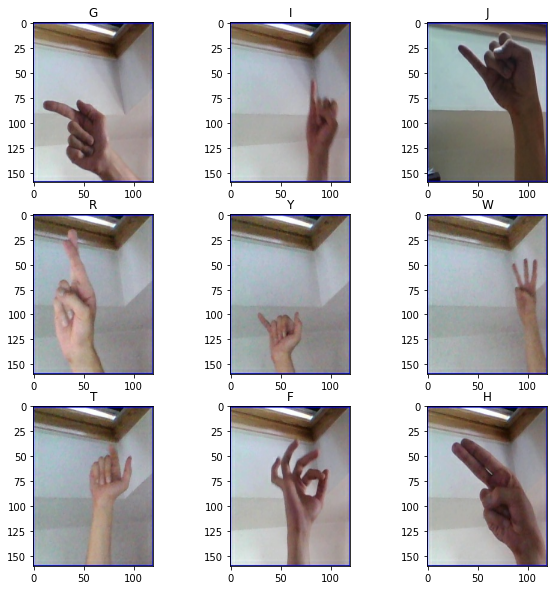

In [ ]:
# Print the first 9 images with their labels

plt.figure(figsize=(10, 10))

# Using option take(1) implies that we are taking a single tuple of data (all the elements of that data point including the label)
# We are extracting the elements of the data that fit

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("on")

In [ ]:
# Pre-Processing steps needed to be carried out such that we can structure the data to not produce any blocking issues (I/O ports)

norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (norm_layer(x), y))
vali_data = vali_data.map(lambda x,y: (norm_layer(x),y))
autotune = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=autotune)
vali_data = vali_data.cache().prefetch(buffer_size=autotune)

In [ ]:
########################## Model described by: https://analyticsindiamag.com/hands-on-guide-to-multi-class-classification-using-mobilenet_v2/ ######################################

# By default, Tte bottom and top layer of the model have classes of 1000, but we have less classes to predict.
# TensorFlow also provides a version of the MobileNet model without the 1000 neuron classification layer.

# This model requires all iamges being resized to 224 x 224 pixels

feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' 

feature_layer = hub.KerasLayer(feature_extractor_model, input_shape=(image_height,image_width,3),trainable=False)

INPUT_SHAPE = (image_height, image_width, 3)

model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(num_classes)])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()


In [ ]:
############################################################### Alternate Edge Impulse Inspired model type ##################################################################

INPUT_SHAPE = (image_height, image_width, 3)

base_model = tf.keras.applications.MobileNetV2(
    include_top = False,
    input_shape = INPUT_SHAPE, alpha=0.35,
    weights = 'imagenet'
)

base_model.trainable = False

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE, name='x_input'))
# Don't include the base model's top layers
last_layer_index = -3
model.add(tf.keras.Model(inputs=base_model.inputs, outputs=base_model.layers[last_layer_index].output))
model.add(tf.keras.layers.Dense(14, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

model.summary()

2031616/2019640 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 5, 4, 1280)        405088    
                                                                 
 dense (Dense)               (None, 5, 4, 14)          17934     
                                                                 
 dropout (Dropout)           (None, 5, 4, 14)          0         
                                                                 
 flatten (Flatten)           (None, 280)               0         
                                                                 
 dense_1 (Dense)             (None, 29)                8149      
                                                                 
Total params: 431,171
Trainable params: 26,083
Non-trainable params: 405,088
________________________________________________

In [ ]:
history = model.fit(train_data,validation_data=vali_data,epochs=10)

Epoch 1/10
182/182 [==============================] - 144s 769ms/step - loss: 2.6250 - accuracy: 0.2531 - val_loss: 2.1219 - val_accuracy: 0.3509
Epoch 2/10
182/182 [==============================] - 120s 660ms/step - loss: 1.2105 - accuracy: 0.6287 - val_loss: 1.4986 - val_accuracy: 0.5166
Epoch 3/10
182/182 [==============================] - 116s 637ms/step - loss: 0.7585 - accuracy: 0.7557 - val_loss: 1.2482 - val_accuracy: 0.6078
Epoch 4/10
182/182 [==============================] - 116s 636ms/step - loss: 0.5649 - accuracy: 0.8201 - val_loss: 1.0909 - val_accuracy: 0.6667
Epoch 5/10
182/182 [==============================] - 116s 638ms/step - loss: 0.4441 - accuracy: 0.8535 - val_loss: 1.0669 - val_accuracy: 0.6766
Epoch 6/10
182/182 [==============================] - 116s 637ms/step - loss: 0.3660 - accuracy: 0.8772 - val_loss: 1.0002 - val_accuracy: 0.7005
Epoch 7/10
182/182 [==============================] - 121s 664ms/step - loss: 0.3087 - accuracy: 0.8977 - val_loss: 0.9720 -

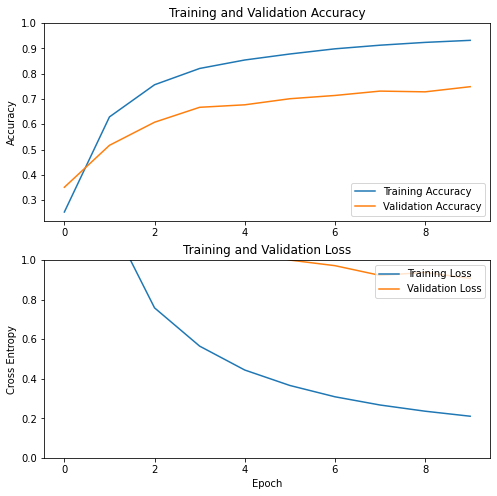

In [ ]:
# Plotting the results (training and Validation)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

tf.Tensor(
[14 28 28 28 22 19 24 10 28 22 10 10 10 11 28 28 22  5 28 24 24 11 28 28
 28 11 11 22  5 28 11 28 10 28 10 28 22 23 28 24 10 14 28 28 10 28 22 24
 22 19 22 22 22 10 28 11 16 28 22 22 28 28 28 10 28 28 28 10 28 16 24 22
 22 28 16 28 25 28 14  5 16 22 11 10 14 28 22 24 28 28 25 22 28 24 28 22
 28 16 10 19 16 22 10 28 28 24 28 22 16 28 22 22 28 14 28  5 28 22 28 28
 28 11 28 10 28 28 28  5], shape=(128,), dtype=int64)


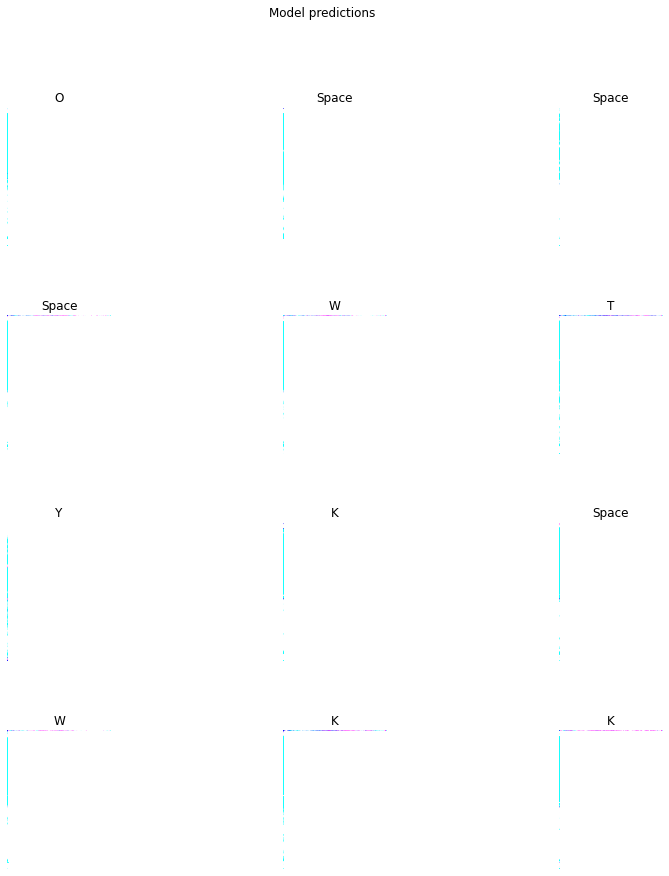

In [ ]:
# get and decode the predictions

vali_data = vali_data.shuffle(buffer_size = 10 * batch_size) 

for images, labels in vali_data.take(1):

      predicted_batch = model.predict(images)
      predicted_id = tf.math.argmax(predicted_batch, axis=-1)
      predicted_label = classes[predicted_id]
      plt.figure(figsize=(14,14))
      plt.subplots_adjust(hspace=0.5)

      for i in range(12):

          plt.subplot(4, 3, i + 1)
          plt.imshow(images[i])
          plt.title(predicted_label[i].title())
          plt.axis('off')
          plt.tight_layout
          plt.suptitle('Model predictions')



In [ ]:
model.save('/content/gdrive/MyDrive/assets/sign_language_recognition.h5') 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
